In [15]:
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.font_manager import FontProperties
font = FontProperties(family='Arial', size=15)

In [21]:
greense = (0/255, 151/255, 37/255,1)
bluese = (0/255, 139/255, 251/255,1)
redse = (255/255, 0/255, 78/255,1)
purplese = (196/255, 78/255, 212/255,1)
brownse = (208/255, 134/255, 48/255,1)
greyse = (158/255, 158/255, 158/255,1)
bluegreyse = (76/255, 114/255, 176/255,1)
orangese = (255/255, 127/255, 14/255,1)

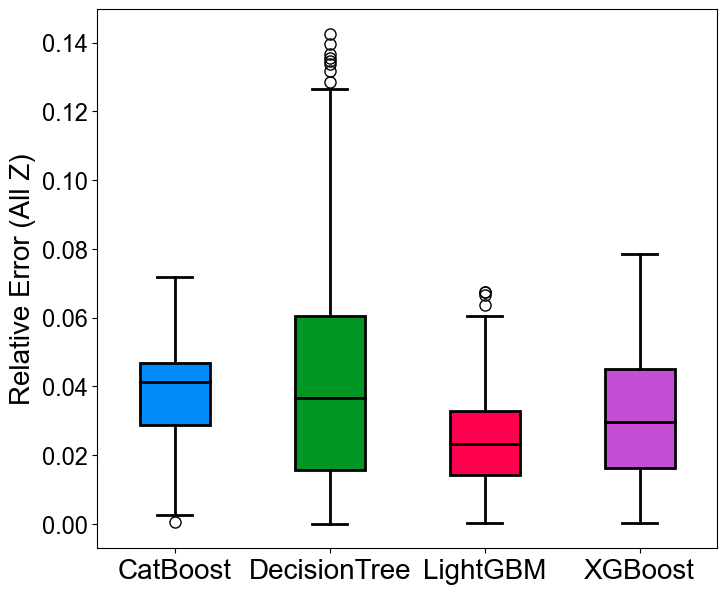

In [72]:

# # 设定路径
# folder_path = '/mnt/data/'

# 文件名列表
file_names = [
    'pre_boxfig_被测电池_10_模型catboost.txt',
    'pre_boxfig_被测电池_10_模型DecisionTree.txt',
    'pre_boxfig_被测电池_10_模型lightgbm.txt',
    'pre_boxfig_被测电池_10_模型XGBoost.txt'
]

# 初始化列表以存储relative_error_all和relative_error_top
relative_error_all_models = []
relative_error_top_models = []

# 读取文件并计算相对误差
for file_name in file_names:

        with open(file_name, 'r', encoding='gbk') as file:
            lines = file.readlines()
            y_test = np.fromstring(lines[0].strip(), sep=' ')
            y_all_pred = np.fromstring(lines[1].strip(), sep=' ')
            y_top_pred = np.fromstring(lines[2].strip(), sep=' ')
        
        # 计算relative_error_all和relative_error_top
            relative_error_all = np.abs(y_all_pred - y_test) / y_test
            relative_error_top = np.abs(y_top_pred - y_test) / y_test
        
        # 添加到相应列表
            relative_error_all_models.append(relative_error_all)
            relative_error_top_models.append(relative_error_top)

        
# 现在绘制箱型图
# 第一个箱型图：四个模型的relative_error_all的箱型图
plt.figure(figsize=(8, 7))
box = plt.boxplot(relative_error_all_models, labels=['CatBoost', 'DecisionTree', 'LightGBM', 'XGBoost'],patch_artist=True)
plt.ylabel('Relative Error (All Z)', fontdict={'size': 20, 'family': 'Arial'})
greense = (0/255, 151/255, 37/255,1)
bluese = (0/255, 139/255, 251/255,1)
redse = (255/255, 0/255, 78/255,1)
purplese = (196/255, 78/255, 212/255,1)
colors = [bluese, greense, redse, purplese]
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
# 设置箱体边框的粗细
for box_patch in box['boxes']:
    box_patch.set_linewidth(2)

# 设置须线的粗细
for whisker in box['whiskers']:
    whisker.set_linewidth(2)

# 设置顶帽的粗细
for cap in box['caps']:
    cap.set_linewidth(2)

# 设置中位线的粗细
for median in box['medians']:
    median.set_color('black')
    median.set_linewidth(2)

# 设置离群点的粗细（如果有的话）
for flier in box['fliers']:
    flier.set(markersize=8)  # 离群点通常是点，这里设置点的大小

# plt.title('Relative Error of All Predictions Across Models')

plt.xticks(fontsize=20,fontproperties=font)  # 设置横坐标刻度的字体大小为 15
plt.yticks(fontsize=17,fontproperties=font)

plt.savefig( f"box all.pdf", format='pdf', dpi=600, bbox_inches='tight')
plt.savefig( f"box all.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()




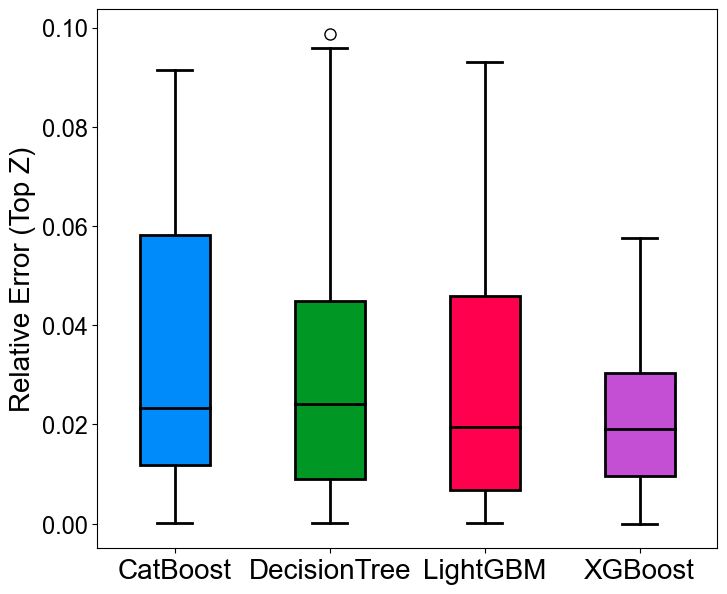

In [73]:
plt.figure(figsize=(8, 7))
box=plt.boxplot(relative_error_top_models, labels=['CatBoost', 'DecisionTree', 'LightGBM', 'XGBoost'],patch_artist=True)
plt.ylabel('Relative Error (Top Z)', fontdict={'size': 20, 'family': 'Arial'})
greense = (0/255, 151/255, 37/255,1)
bluese = (0/255, 139/255, 251/255,1)
redse = (255/255, 0/255, 78/255,1)
purplese = (196/255, 78/255, 212/255,1)
colors = [bluese, greense, redse, purplese]
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# plt.title('Relative Error of All Predictions Across Models')
# 设置箱体边框的粗细
for box_patch in box['boxes']:
    box_patch.set_linewidth(2)

# 设置须线的粗细
for whisker in box['whiskers']:
    whisker.set_linewidth(2)

# 设置顶帽的粗细
for cap in box['caps']:
    cap.set_linewidth(2)

# 设置中位线的粗细
for median in box['medians']:
    median.set_color('black')
    median.set_linewidth(2)

# 设置离群点的粗细（如果有的话）
for flier in box['fliers']:
    flier.set(markersize=8)  # 离群点通常是点，这里设置点的大小

plt.xticks(fontsize=20,fontproperties=font)  # 设置横坐标刻度的字体大小为 15
plt.yticks(fontsize=17,fontproperties=font)
plt.savefig( f"box top.pdf", format='pdf', dpi=600, bbox_inches='tight')
plt.savefig( f"box top.jpg", format='jpg', dpi=1000, bbox_inches='tight')

# plt.title('Relative Error of Top Predictions Across Models')
plt.show()

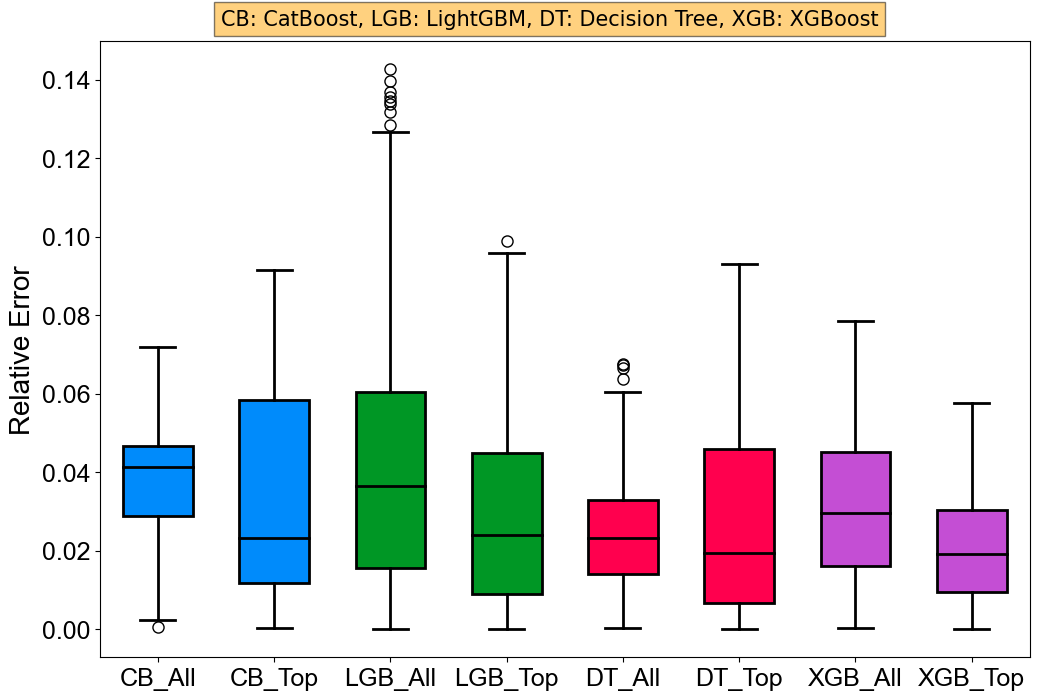

In [69]:
# 第二个箱型图：四个模型的relative_error_all和relative_error_top的箱型图
plt.figure(figsize=(12,8))

# Calculate positions for each pair of 'all' and 'top' predictions
positions_all = np.array(range(len(relative_error_all_models))) * 2 + 1
positions_top = positions_all + 1

# Plot 'all' predictions
box1=plt.boxplot(relative_error_all_models, positions=positions_all, widths=0.6, labels=['CB_All', 'LGB_All', 'DT_All', 'XGB_All'],patch_artist=True)

# Plot 'top' predictions next to the corresponding 'all' predictions
box2=plt.boxplot(relative_error_top_models, positions=positions_top, widths=0.6, labels=['CB_Top', 'LGB_Top', 'DT_Top', 'XGB_Top'],patch_artist=True)


greense = (0/255, 151/255, 37/255,1)
bluese = (0/255, 139/255, 251/255,1)
redse = (255/255, 0/255, 78/255,1)
purplese = (196/255, 78/255, 212/255,1)
colors = [bluese, greense, redse, purplese]
for patch, color in zip(box1['boxes'], colors):
    patch.set_facecolor(color)
for patch, color in zip(box2['boxes'], colors):
    patch.set_facecolor(color)
# 设置箱体边框的粗细
for box_patch in box1['boxes']:
    box_patch.set_linewidth(2)

# 设置须线的粗细
for whisker in box1['whiskers']:
    whisker.set_linewidth(2)

# 设置顶帽的粗细
for cap in box1['caps']:
    cap.set_linewidth(2)

# 设置中位线的粗细
for median in box1['medians']:
    median.set_color('black')
    median.set_linewidth(2)

# 设置离群点的粗细（如果有的话）
for flier in box1['fliers']:
    flier.set(markersize=8)  # 离群点通常是点，这里设置点的大小
    # 设置箱体边框的粗细
for box_patch in box2['boxes']:
    box_patch.set_linewidth(2)

# 设置须线的粗细
for whisker in box2['whiskers']:
    whisker.set_linewidth(2)

# 设置顶帽的粗细
for cap in box2['caps']:
    cap.set_linewidth(2)

# 设置中位线的粗细
for median in box2['medians']:
    median.set_color('black')
    median.set_linewidth(2)

# 设置离群点的粗细（如果有的话）
for flier in box2['fliers']:
    flier.set(markersize=8)  # 离群点通常是点，这里设置点的大小
    
plt.ylabel('Relative Error', fontdict={'size': 20, 'family': 'Arial'})
# plt.title('Comparison of All and Top Predictions Across Models')

# Improve the x-axis labels by rotating them for better readability
plt.xticks(rotation=0)
plt.xticks(fontsize=18,fontproperties=font)  # 设置横坐标刻度的字体大小为 15
plt.yticks(fontsize=18,fontproperties=font)

# 添加模型名称的说明
explanation = "CB: CatBoost, LGB: LightGBM, DT: Decision Tree, XGB: XGBoost"
plt.figtext(0.50, 0.9, explanation, ha="center", fontsize=15, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

plt.savefig( f"box_duibi.pdf", format='pdf', dpi=600, bbox_inches='tight')
plt.savefig( f"box_duibi.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()